đầu tiên chúng ta sẽ chèn khác thư viện cần thiết

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Tiếp đến sẽ tải file csv từ máy tính lên và hiển thị 5 dòng đầu tiên trong tập dự liệu bằng câu lệnh df.head()


In [ ]:
df = pd.read_csv("/content/Spotify_mining.csv")
df.head()

,Unnamed: 0,Acousticness,Danceability,Duration_ms,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Valence,Target,Track,Artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,0.904,1,Parallel Lines,Junior Boys


Tiếp đến chúng ta sẽ xóa cột Unnamed: 0 vì cột này là cột số thứ tự trong file csv chúng ta tải lên

In [ ]:
df = df.drop('Unnamed: 0', axis=1)


Sau khi xóa xong chúng ta kiểm tra lại tập dữ liệu xem đã xóa thành công hay chưa

In [ ]:
df.head()

,Acousticness,Danceability,Duration_ms,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Valence,Target,Track,Artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,0.904,1,Parallel Lines,Junior Boys


In [ ]:
# Kiểm tra thông tin dữ liệu gồm bao nhiêu cột và bao nhiêu hàng
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Acousticness      2017 non-null   float64
 1   Danceability      2017 non-null   float64
 2   Duration_ms       2017 non-null   int64  
 3   Energy            2017 non-null   float64
 4   Instrumentalness  2017 non-null   float64
 5   Key               2017 non-null   int64  
 6   Liveness          2017 non-null   float64
 7   Loudness          2017 non-null   float64
 8   Mode              2017 non-null   int64  
 9   Speechiness       2017 non-null   float64
 10  Tempo             2017 non-null   float64
 11  Valence           2017 non-null   float64
 12  Target            2017 non-null   int64  
 13  Track             2017 non-null   object 
 14  Artist            2017 non-null   object 
dtypes: float64(9), int64(4), object(2)
memory usage: 236.5+ KB


In [ ]:
df.describe()

,Acousticness,Danceability,Duration_ms,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Valence,Target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,0.992000,1.000000


Sau đó chúng ta sẽ chia train và test để phục vụ cho phần mining dữ liệu bằng hai thuật toán Random Forest và Decision Tree

In [ ]:
train, test = train_test_split(df, test_size = 0.30)
print("Training samples: {}; Test samples: {}".format(len(train), len(test)))

Training samples: 1411; Test samples: 606


Kết quả chúng ta có tập train sẽ gồm 1411 mẫu để huấn luyện và tập test gồm 606 mẫu để dự đoán.

EDA

Sau đây chúng ta sẽ sử dụng EDA để thực hiện các truy vấn sau

Bây giờ chúng ta sẽ tính toán ma trận tương quan giữa các cặp cột trong dữ liệu bằng cách vẽ đồ thị Heatmap(đồ thị nhiệt)

<ipython-input-8-475f1f3b591e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="Greens_r", cbar=False);


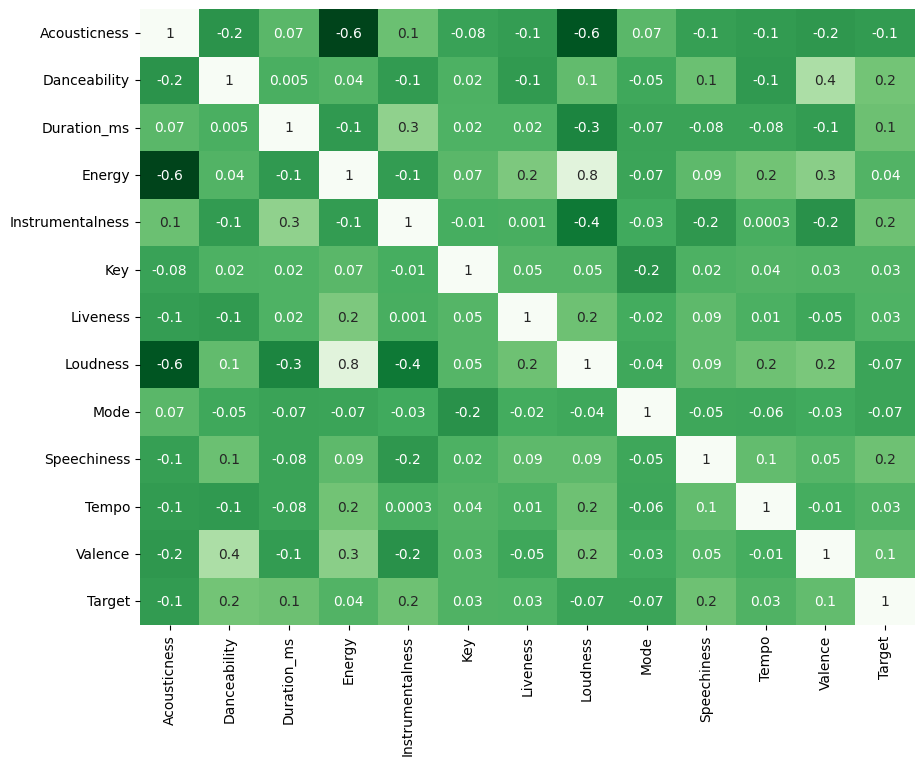

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="Greens_r", cbar=False);

ma trận trên cho ta thấy được mối tương quan giữa các cặp cột trong df. Thấy rõ được cặp Energy và Loudness có độ tương quan cao (0.8) có thế thấy đây là một cặp có độ tương quan dương cao hay nói các khác chúng sẽ có xu hướng tăng cùng nhau.

Tiếp đến chúng ta sẽ truy vấn các câu lệnh khác như:

In [ ]:
## Top 10 bài hát có độ ồn nhất
loudest_track=df[["Loudness","Track"]].sort_values(by="Loudness")[:10]

Sau khi chạy xong dòng lênh lodnest_track cùng xem kết quả của câu lệnh


In [ ]:
loudest_track

,Loudness,Track
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor
1571,-27.350,I Got It Bad And That Ain't Good
1541,-26.924,Two Sleepy People
1546,-25.766,Almas vaggvisa
817,-25.756,"Mozart: Requiem in D Minor, K. 626: VIII. Lacr..."
1537,-25.358,Blue in Green


Đến với câu truy vấn tiếp theo

In [ ]:
##Top 10 nghệ sĩ có mức độ phù hợp của một bản nhạc để khiêu vũ dựa trên sự kết hợp của các yếu tố âm nhạc
dance=df[["Danceability","Track","Artist"]].sort_values(by="Danceability",ascending=False)[:10]
dance

,Danceability,Track,Artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice
1136,0.950,Bad Liar,Selena Gomez
1977,0.947,Fuck Kd,StaRR Lyfe
138,0.944,Sippin On Some Syrup,Three 6 Mafia
623,0.941,I'm Different,2 Chainz
1591,0.941,Little Green Apple,Tumble Tots


In [ ]:
# Top 10 nghệ sĩ có số lần xuất hiện nhiều nhất
speaker_df = df.groupby('Artist').count().reset_index()[['Artist', 'Target']]
speaker_df.columns = ['Artist', 'Appearances']
speaker_df = speaker_df.sort_values('Appearances', ascending=False)
speaker_df.head(10)

,Artist,Appearances
356,Drake,16
960,Rick Ross,13
345,Disclosure,12
81,Backstreet Boys,10
1273,WALK THE MOON,10
405,FIDLAR,9
277,Crystal Castles,9
1,*NSYNC,8
409,Fall Out Boy,8
788,Michael Jackson,8


Chia dữ liệu train và test để phân tích và `Target` là mẫu mục tiêu


In [ ]:
# Kiểm tra các cột mang giá trị là số
numeric_columns = df.select_dtypes(include='number')
print(numeric_columns)

      Acousticness  Danceability  Duration_ms  Energy  Instrumentalness  Key  \
0          0.01020         0.833       204600   0.434          0.021900    2   
1          0.19900         0.743       326933   0.359          0.006110    1   
2          0.03440         0.838       185707   0.412          0.000234    2   
3          0.60400         0.494       199413   0.338          0.510000    5   
4          0.18000         0.678       392893   0.561          0.512000    5   
...            ...           ...          ...     ...               ...  ...   
2012       0.00106         0.584       274404   0.932          0.002690    1   
2013       0.08770         0.894       182182   0.892          0.001670    1   
2014       0.00857         0.637       207200   0.935          0.003990    0   
2015       0.00164         0.557       185600   0.992          0.677000    1   
2016       0.00281         0.446       204520   0.915          0.000039    9   

      Liveness  Loudness  Mode  Speechi

Build Random Forest Classifier

Do chúng ta tính toán ma trận tương quan giữa các cặp ở phần EDA và cho ra kết quả là Energy và Loudness chiếm độ tương quan dương mạnh (0.8) nên ta sẽ xóa 1 trong 2 cột để có được độ chính xác cao hơn. Theo bài em sẽ xóa đi Energy

In [ ]:
features = ['Acousticness',	'Danceability',	'Duration_ms', 'Loudness',	'Instrumentalness',
            'Key',	'Liveness','Mode','Speechiness',	'Tempo','Valence'	]

X_train = train[features]
y_train = train["Target"]

X_test = test[features]
y_test = test["Target"]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
#Xây dựng mô hình Random Forest
rf = RandomForestClassifier(n_estimators=100)

In [ ]:
# Huấn luyện mô hình trên tập huấn luyện
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import mean_squared_error
# Dự đoán nhãn cho tập kiểm tra
y_pred = rf.predict(X_test)
# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy of Random Forest", accuracy)

Accuracy of Random Forest 78.05280528052805


In [ ]:
#Xem điểm tính năng
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Loudness            0.129558
Instrumentalness    0.128354
Danceability        0.116122
Speechiness         0.110827
Duration_ms         0.105954
Acousticness        0.101399
Valence             0.095353
Tempo               0.082338
Liveness            0.079101
Key                 0.037551
Mode                0.013443
dtype: float64

Chạy 10 lần kết quả, em thấy rằng tính năng quan trọng nhất là Instrumentalness và biến Mode là biến ít bị ảnh hương nhất.Chúng ta sẽ lấy tiêu chuẩn để dự đoán là các features_scores >= 0.1

Tiếp theo,chúng ta sẽ xây dựng lại mô hình Random Forest và kiểm tra độ chính xác

In [ ]:
X_train = X_train.drop(['Mode'], axis=1)
X_test = X_test.drop(['Mode'], axis=1)

X_train = X_train.drop(['Key'], axis=1)
X_test = X_test.drop(['Key'], axis=1)

X_train = X_train.drop(['Liveness'], axis=1)
X_test = X_test.drop(['Liveness'], axis=1)

X_train = X_train.drop(['Tempo'], axis=1)
X_test = X_test.drop(['Tempo'], axis=1)


In [ ]:
X_train.shape

(1411, 7)

In [ ]:
X_test.shape

(606, 7)

In [ ]:
#Mô hình Random Forest với các tính năng đã chọn
rf = RandomForestClassifier(n_estimators=100)
# Huấn luyện mô hình trên tập huấn luyện
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)
# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy of Random Forest after delete feature not important:", accuracy)

Accuracy of Random Forest after delete feature not important: 78.21782178217822


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[253  78]
 [ 54 221]]


** Build Decision Tree Classifier **

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
# Xây dựng mô hình Decision Tree
c = tree.DecisionTreeClassifier(min_samples_leaf=3)


In [ ]:
features = ['Acousticness',	'Danceability',	'Duration_ms','Instrumentalness',
            'Key',	'Liveness',	'Loudness',	'Mode','Speechiness',	'Tempo','Valence'	]

In [ ]:

X_train = train[features]
y_train = train["Target"]

X_test = test[features]
y_test = test["Target"]

In [ ]:
#Huấn luyện mô hình
dt = c.fit(X_train, y_train)

In [ ]:
# Dự báo mô hình trên tập test
y_pred = c.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
print("Accuracy of Decision Tree:",(score))

Accuracy of Decision Tree: 67.49174917491749


In [ ]:
feature_scores = pd.Series(c.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Loudness            0.154875
Speechiness         0.148765
Instrumentalness    0.139322
Danceability        0.121132
Valence             0.116037
Acousticness        0.107168
Duration_ms         0.070888
Liveness            0.066465
Tempo               0.056095
Key                 0.018598
Mode                0.000653
dtype: float64

In [ ]:
#Bây giờ, chúng ta sẽ sử dụng biến quan trọng của tính năng để xem điểm quan trọng của tính năng
# loại bỏ tính năng có độ tương quan cao và có giá trị feature_scores < 0.0
X_train = X_train.drop(['Mode'], axis=1)
X_test = X_test.drop(['Mode'], axis=1)

X_train = X_train.drop(['Key'], axis=1)
X_test = X_test.drop(['Key'], axis=1)

X_train = X_train.drop(['Liveness'], axis=1)
X_test = X_test.drop(['Liveness'], axis=1)

X_train = X_train.drop(['Tempo'], axis=1)
X_test = X_test.drop(['Tempo'], axis=1)

X_train = X_train.drop(['Duration_ms'], axis=1)
X_test = X_test.drop(['Duration_ms'], axis=1)





In [ ]:
c = tree.DecisionTreeClassifier(min_samples_leaf=3)

In [ ]:
#Huấn luyện mô hình
dt = c.fit(X_train, y_train)

In [ ]:
# Dự báo mô hình trên tập test
y_pred = c.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
print("Accuracy of Decision Tree:",(score))

Accuracy of Decision Tree: 67.98679867986799


In [ ]:
import re
import graphviz
from IPython.display import Image

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import graphviz

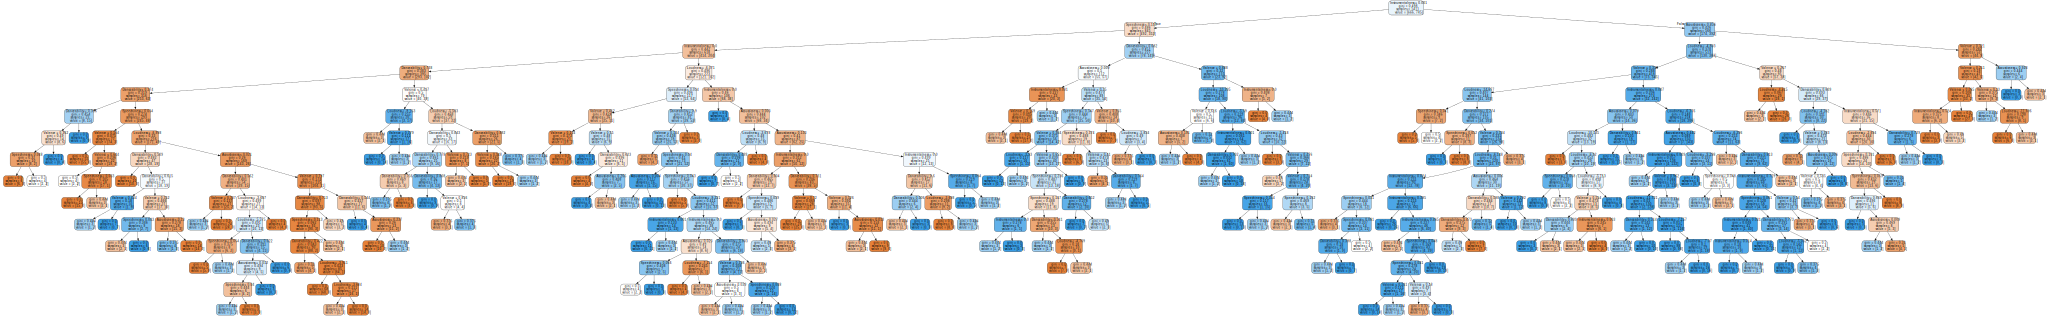

<Figure size 100x200 with 0 Axes>

In [ ]:
dot_data = tree.export_graphviz(c, out_file=None,
                      feature_names=X_train.columns.tolist(),
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph.render(view=True)
plt.figure(figsize = (1, 2))
graph

In [ ]:
# Lưu hình ảnh vào tệp tin "decision_tree.png"
graph.render("c", format='png')

'c.png'

In [ ]:
from google.colab import files
files.download('c.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>